<a href="https://colab.research.google.com/github/gabrieldorte/analise_dados_escolares/blob/main/dados_escolares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#IMPORTANDO AS BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#DEFINIÇÂO DAS CORES
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'


In [3]:
#LENDO A BASE DE DADOS
ideb = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos-composicao-relacionamento/master/dados/ideb_reg_2005_2021.csv")

ideb.head(6)

,ano,regiao,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb
0,2005,Centro-Oeste,estadual,fundamental,EFAF,72.1,0.721828,233.50,227.88,4.356453,3.1
1,2005,Centro-Oeste,estadual,fundamental,EFAI,83.0,0.837081,185.38,172.13,4.631618,3.9
2,2005,Centro-Oeste,estadual,medio,EM,68.0,0.695138,261.23,251.52,4.123654,2.9
3,2005,Centro-Oeste,privada,fundamental,EFAF,94.4,0.943491,283.57,266.82,5.840183,5.5
4,2005,Centro-Oeste,privada,fundamental,EFAI,97.3,0.972388,223.64,210.36,6.057024,5.9
5,2005,Centro-Oeste,privada,medio,EM,92.4,0.943179,338.52,309.85,6.082840,5.7


In [4]:
#CRIANDO A TABELA PARA ANALISE

ideb_efai = ideb.query("anos_escolares == 'EFAI'")[["regiao","nota_saeb_matematica", "nota_saeb_lingua_portuguesa"]]
ideb_efai = ideb_efai.reset_index(drop = True)
ideb_efai.head()

,regiao,nota_saeb_matematica,nota_saeb_lingua_portuguesa
0,Centro-Oeste,185.38,172.13
1,Centro-Oeste,223.64,210.36
2,Nordeste,162.61,156.61
3,Nordeste,211.16,199.88
4,Norte,166.39,161.30


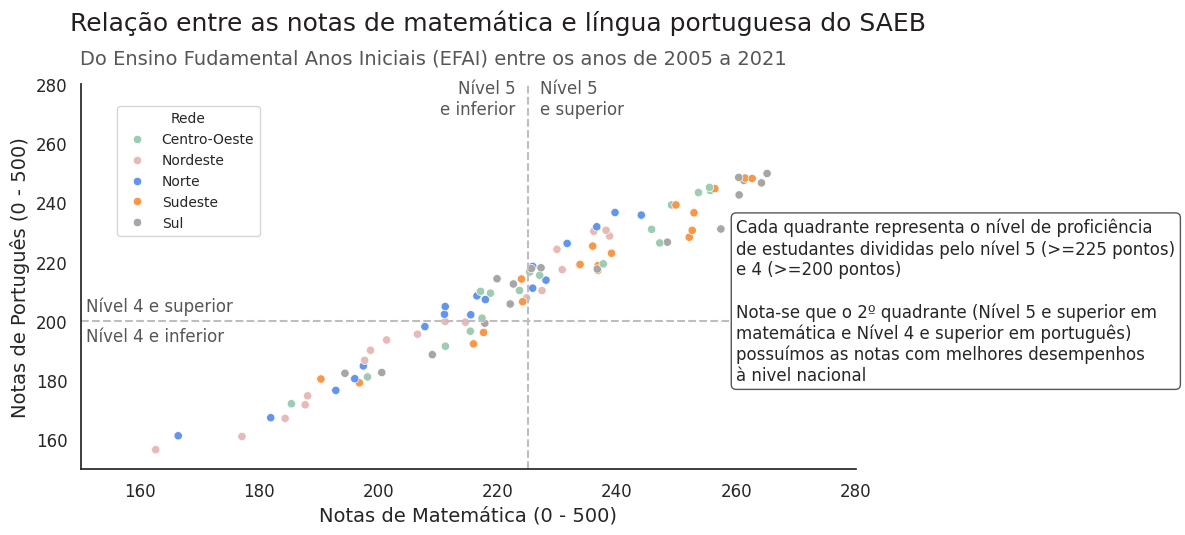

In [9]:
#GERANDO O GRÁFICO

cores = [VERDE3, VERMELHO2, AZUL3, LARANJA1, CINZA4]
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style="white")
ax = sns.scatterplot(data = ideb_efai, x = 'nota_saeb_matematica', y = 'nota_saeb_lingua_portuguesa', palette = cores, hue = 'regiao')
plt.suptitle('Relação entre as notas de matemática e língua portuguesa do SAEB', size=18, color=CINZA1, ha = 'right', x = 0.97, y = 1.03)
plt.title('Do Ensino Fudamental Anos Iniciais (EFAI) entre os anos de 2005 a 2021', fontsize=14, color=CINZA3, pad = 15, loc = "left")
ax.legend(bbox_to_anchor=(155, 275), title='Rede', title_fontsize  = 10, fontsize = 10, loc='upper left', bbox_transform=ax.transData)
ax.set_xlabel('Notas de Matemática (0 - 500)',  fontsize = 14)
ax.set_ylabel('Notas de Português (0 - 500)', fontsize = 14)
ax.xaxis.set_tick_params(labelsize=12, color = CINZA2)
ax.set_xlim(150, 280)
ax.yaxis.set_tick_params(labelsize=12, color = CINZA2)
ax.set_ylim(150, 280)
sns.despine()
ax.text(ax.get_xlim()[0] + 1, 202, 'Nível 4 e superior', fontsize=12, color = CINZA3, va = "bottom")
ax.text(ax.get_xlim()[0] + 1 , 198, 'Nível 4 e inferior', fontsize=12, color = CINZA3, va = "top")
plt.axhline(y = 200, color = CINZA5, linestyle='--')
ax.text(223, ax.get_ylim()[1] - 10, 'Nível 5\ne inferior', fontsize=12, color = CINZA3, ha="right")
ax.text(227, ax.get_ylim()[1] - 10, 'Nível 5\ne superior', fontsize=12, color = CINZA3, ha="left")
plt.axvline(x = 225, color = CINZA5, linestyle='--')
ax.annotate("Cada quadrante representa o nível de proficiência\nde estudantes divididas pelo nível 5 (>=225 pontos)\ne 4 (>=200 pontos)\n\n"
            "Nota-se que o 2º quadrante (Nível 5 e superior em \nmatemática e Nível 4 e superior em português)\n"
            "possuímos as notas com melhores desempenhos \nà nivel nacional", xy=(260, 180), xycoords='data',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3),
            xytext=(0, 0), textcoords='offset points')

plt.show()


In [6]:
#MODIFICANDO A BASE

ideb_efaf = ideb.query("anos_escolares == 'EFAF'")[["regiao","taxa_aprovacao", "nota_saeb_media_padronizada", "ideb"]]
ideb_efaf = ideb_efaf.reset_index(drop = True)
ideb_efaf.head()

,regiao,taxa_aprovacao,nota_saeb_media_padronizada,ideb
0,Centro-Oeste,72.1,4.356453,3.1
1,Centro-Oeste,94.4,5.840183,5.5
2,Nordeste,66.8,3.925063,2.6
3,Nordeste,92.2,5.796700,5.3
4,Norte,75.3,4.097388,3.1


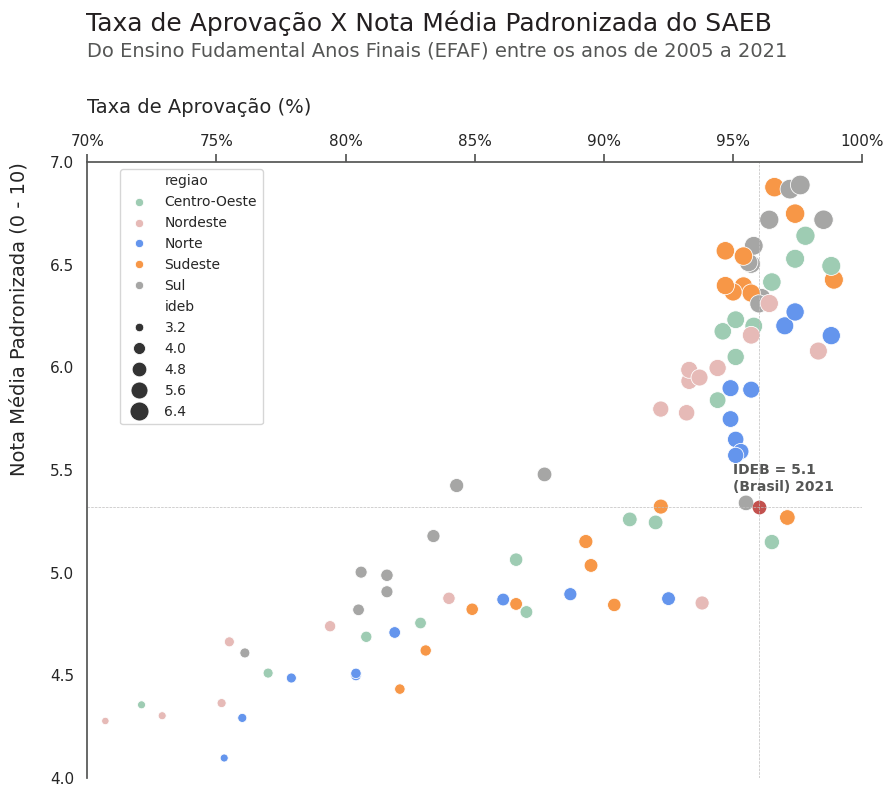

In [10]:
#Configurando o gráfico com parâmetros que potencializam a visualização dos dados

fig, ax = plt.subplots(figsize=(10,8))
cores = [VERDE3, VERMELHO2, AZUL3, LARANJA1, CINZA4]
ax = sns.scatterplot(data = ideb_efaf, x ='taxa_aprovacao', y = 'nota_saeb_media_padronizada', hue = 'regiao', palette = cores, size = 'ideb', sizes = (10, 200))
ax.scatter([96], [5.32], color=VERMELHO1, s=80)
plt.axvline(x=96, color = CINZA5, linestyle='--', linewidth=0.5) # adicionando linhas de referência do IDEB nacional
plt.axhline(y=5.32, color = CINZA5, linestyle='--', linewidth=0.5) # adicionando linhas de referência do IDEB nacional
ax.text(95, 5.4, 'IDEB = 5.1\n(Brasil) 2021', color=CINZA3, fontsize=10, fontweight='bold')
plt.suptitle('Taxa de Aprovação X Nota Média Padronizada do SAEB', size=18, color=CINZA1, ha = 'right', x = 0.81, y = 1.07)
plt.title('Do Ensino Fudamental Anos Finais (EFAF) entre os anos de 2005 a 2021', fontsize=14, color=CINZA3, pad = 30, loc = "left")
ax.legend(bbox_to_anchor=(71, 7), fontsize = 10, loc='upper left', bbox_transform=ax.transData)
ax.xaxis.set_tick_params(labelsize=11, color = CINZA3)
ax.yaxis.set_tick_params(labelsize=11, color = CINZA3)
ax.set_xlim(70, 100)
ax.set_ylim(4, 7)
xticks = np.arange(70, 105, 5)
yticks = np.arange(4, 7.5, 0.5)
plt.setp(ax, xticks=xticks, xticklabels=[str(i)+'%' for i in xticks], yticks=yticks)
ax.tick_params(top=True, bottom=False, labelbottom=False, labeltop=True)
ax.xaxis.set_label_position('top')
ax.set_xlabel('Taxa de Aprovação (%)', fontsize = 14, loc="left", labelpad = 15)
ax.set_ylabel('Nota Média Padronizada (0 - 10)', fontsize = 14, loc="top", labelpad = 15)
ax.spines[['right', "bottom"]].set_visible(False)
ax.spines[['top', "left"]].set_color(CINZA3)

plt.show()